In [1]:
#include <iostream>
#include <string>
#include <stdio.h> 

In [2]:
TFile *file = TFile::Open("../Tracks_Clusters.root");
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print();

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

# Excercise 8

In [18]:
float evtw = -1;
vector <float> *reco_R10_pt;
vector <float> *reco_R10_trimmed_pt;

tree->SetBranchAddress("EventWeight",&evtw);
tree->SetBranchAddress("RecoJets_R10_pt",&reco_R10_pt);
tree->SetBranchAddress("RecoJets_R10_Trimmed_pt",&reco_R10_trimmed_pt);

TH1F *hist_leading_reco_pt = new TH1F("Leading pT","Leading jet pT; pT (GeV); Events",100,0,2000);
TH1F *hist_leading_reco_trimmed_pt = new TH1F("Leading pT","Leading jet pT; pT (GeV); Events",100,0,2000);

TCanvas *canvas = new TCanvas("Canvas","",800,600);

Warning in <TFile::Append>: Replacing existing TH1: Leading pT (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Leading pT (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [19]:
int nentries, nbytes, i;

nentries = (Int_t)tree->GetEntries();

for(i = 0;i < nentries;i++){
    nbytes=tree->GetEntry(i);
    
    if(reco_R10_pt->at(0)>0){
        hist_leading_reco_pt->Fill(reco_R10_pt->at(0)/1000.0,evtw);
    }
    
    if(reco_R10_trimmed_pt->at(0)>0){
        hist_leading_reco_trimmed_pt->Fill(reco_R10_trimmed_pt->at(0)/1000.0,evtw);
    }
    
}

std::cout << "Done!" << std::endl;

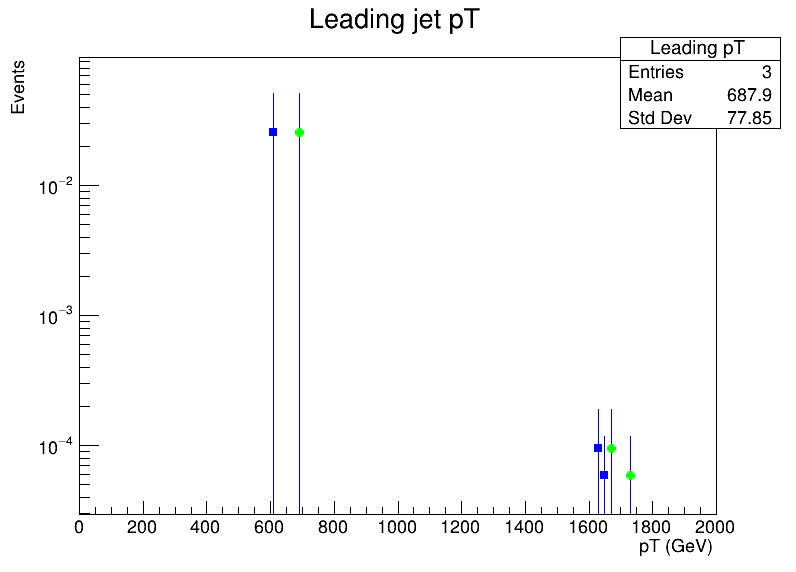

In [20]:
hist_leading_reco_pt->SetMarkerColor(kGreen);
hist_leading_reco_pt->SetMarkerStyle(20);
hist_leading_reco_pt->Draw();
hist_leading_reco_trimmed_pt->SetMarkerColor(kBlue);
hist_leading_reco_trimmed_pt->SetMarkerStyle(21);
hist_leading_reco_trimmed_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();